# 池化层

实现池化层的正向传播

In [2]:
import torch as tor
from torch import nn as tor_nn
from d2l import torch as d2l_tor

In [3]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = tor.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i:i + p_h, j:j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i:i + p_h, j:j + p_w].mean()
    return Y

验证最大池化层

In [4]:
X = tor.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

验证平均池化层

In [5]:
pool2d(X, [2, 2], 'avg')

tensor([[2., 3.],
        [5., 6.]])

填充与步幅并不直接实现，就直接采用一些外部填充的方式(外面做)去实现相关的概念吧！

In [7]:
X = tor.arange(16, dtype=tor.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

升读学习中步幅与池化窗口大小相同(我们可以看到一个重要的点就是我们如果使得步幅与池化窗口大小相同，那么他们是不会重叠的！)

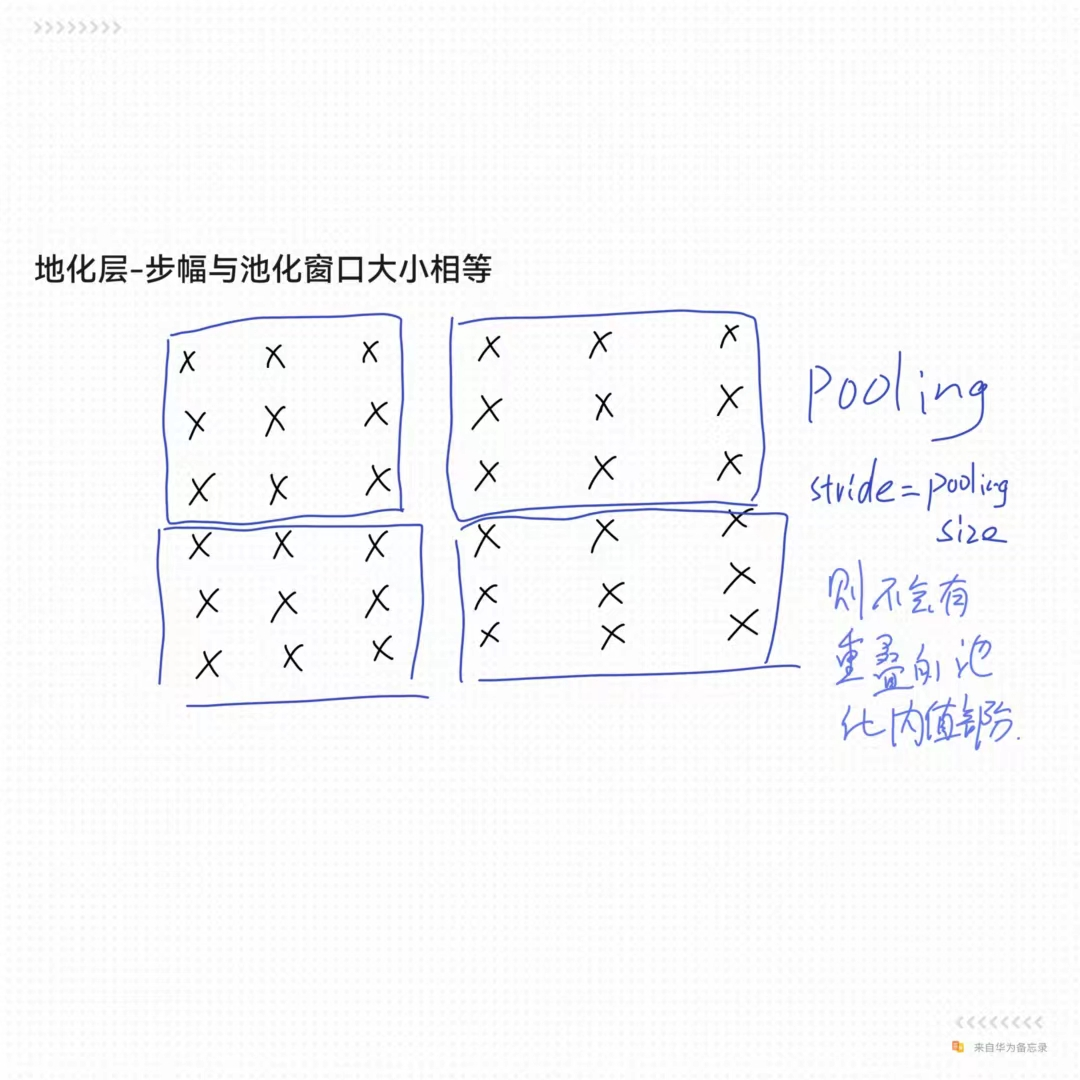

In [8]:
pool2d = tor_nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

池化在每层单独通道上的单独计算

In [9]:
X = tor.cat((X, X + 1), 1)
X, X.shape

(tensor([[[[ 0.,  1.,  2.,  3.],
           [ 4.,  5.,  6.,  7.],
           [ 8.,  9., 10., 11.],
           [12., 13., 14., 15.]],
 
          [[ 1.,  2.,  3.,  4.],
           [ 5.,  6.,  7.,  8.],
           [ 9., 10., 11., 12.],
           [13., 14., 15., 16.]]]]),
 torch.Size([1, 2, 4, 4]))

In [10]:
pool2d = tor_nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

In [13]:
# 看到弹幕上有一个非常有趣的留言：stack升维，cat等维
Y = tor.stack((X, X + 2), 0)
Y, Y.shape

(tensor([[[[[ 0.,  1.,  2.,  3.],
            [ 4.,  5.,  6.,  7.],
            [ 8.,  9., 10., 11.],
            [12., 13., 14., 15.]],
 
           [[ 1.,  2.,  3.,  4.],
            [ 5.,  6.,  7.,  8.],
            [ 9., 10., 11., 12.],
            [13., 14., 15., 16.]]]],
 
 
 
         [[[[ 2.,  3.,  4.,  5.],
            [ 6.,  7.,  8.,  9.],
            [10., 11., 12., 13.],
            [14., 15., 16., 17.]],
 
           [[ 3.,  4.,  5.,  6.],
            [ 7.,  8.,  9., 10.],
            [11., 12., 13., 14.],
            [15., 16., 17., 18.]]]]]),
 torch.Size([2, 1, 2, 4, 4]))